In [1]:
import pandas as pd
from sklearn.pipeline import make_pipeline

from sklearn.model_selection import train_test_split

seed = 7

data = pd.read_csv('data/sepsis_final.csv').drop(['Unnamed: 0', 'SUBJECT_ID', 'HADM_ID'], axis=1)
data['Gender'] = data['Gender'].apply(lambda x: 1 if x == 'M' else 0)

X = data.drop(['28 Day Death', 'In Hospital Death'], axis=1)
y = data['28 Day Death']

for column in X.columns:
    X[column] = pd.to_numeric(X[column])
    X[column] = X[column].fillna(X[column].mean())

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=seed)

In [2]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

estimators = [('Scaler', StandardScaler()), ('Log_Reg', LogisticRegression(random_state=seed, solver='liblinear'))]
pipe = Pipeline(estimators)

clf = pipe.fit(X_train, y_train)


In [3]:
import importlib
import medical_explainer
importlib.reload(medical_explainer)

<module 'medical_explainer' from '/home/llja/repos/Uni_ACS/medical_explainer.py'>

| Step 1  ==> Calibrating model


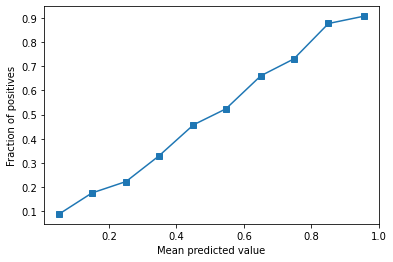

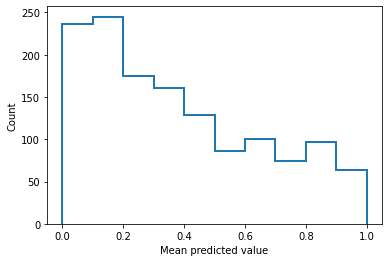

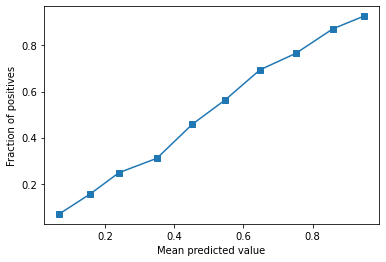

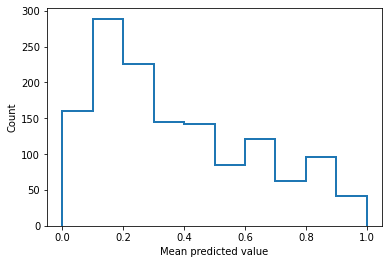

ROC AUC: 0.8123929571466114
Average Precision: 0.748206340300866
Accuracy: 0.7600585223116313
ROC AUC: 0.8108954899277772
Average Precision: 0.7466159490758979
Accuracy: 0.761521580102414

| Step 2 ==> Calculate SHAP values

| Step 3 ==> Fit clinical score calculator
Novel fitting


Probability threshold: 0.1
Score threshold: 8.0

Probability threshold: 0.5
Score threshold: 20.0

Probability threshold: 0.9
Score threshold: 31.0



In [4]:
explainer = medical_explainer.explainer(
    clf, X_train, y_train, X_test, y_test)

explainer.fit(10, shap_method='linear', method='novel')

In [5]:
scores,probs,predictions = explainer.predict_calculator(X_test, 1)

In [6]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

roc_auc = roc_auc_score(y_test, probs)
print("ROC AUC: " + str(roc_auc))

average_precision = average_precision_score(y_test, probs)
print("Average Precision: " + str(average_precision))

# accuracy = accuracy_score(y_test, predictions)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: " + str(accuracy))

# print(confusion_matrix(y_test, predictions))
print(confusion_matrix(y_test, predictions))


ROC AUC: 0.7040282094732359
Average Precision: 0.5684743760581128
Accuracy: 0.6693489392831017
[[664 180]
 [272 251]]


In [7]:
explainer.shap_array_list

[[0.4897615988009157, -1.0180457465040282],
 [-0.45502851800374666, 0.42623075727924487],
 [-0.3519220220261485, 0.30271545156681895],
 [-0.20779726503892024, 0.324007025339478],
 [-0.17863742246382627, 0.4471832805538696],
 [-0.26950501092561224, 0.21680289890474172],
 [-0.24517089968336642, 0.23110133737081984],
 [-0.11993829638362047, 1.0412624645953568],
 [0.23143988765586032, -0.20799328116526303],
 [0.19006903942728104, -0.25673575146575345]]

In [8]:
explainer.score_array_list

[array([ 3., -5.]),
 array([-2.,  2.]),
 array([-2.,  2.]),
 array([-1.,  2.]),
 array([-1.,  2.]),
 array([-1.,  1.]),
 array([-1.,  1.]),
 array([-1.,  5.]),
 array([ 1., -1.]),
 array([ 1., -1.])]

In [9]:
explainer.variables

array(['LOS', 'inotropes', 'Age', 'RDW', 'ICU_LOS', 'Bicarbonate', 'MCV',
       'ICUs', 'MCH', 'Albumin'], dtype=object)

In [11]:
explainer.breakpoints_list

[[-0.3222222222222222, 15.512576648669134, 294.66041666666666],
 [0.0, 0.6575509937319136, 3.0],
 [18.258726899383984, 67.27633115541632, 90.0],
 [11.6, 15.635230530478552, 30.5],
 [0.008, 7.449439007806128, 153.928],
 [0.0, 22.722284384395557, 42.0],
 [60.0, 92.80514714842352, 128.0],
 [0.0, 1.1014949272135255, 5.0],
 [16.2, 30.742601752273348, 44.6],
 [0.0, 2.9539788443753223, 5.2]]

In [12]:
scores,probs,predictions = explainer.predict_calculator(X_test, 1)

In [13]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

roc_auc = roc_auc_score(y_test, probs)
print("ROC AUC: " + str(roc_auc))

average_precision = average_precision_score(y_test, probs)
print("Average Precision: " + str(average_precision))

# accuracy = accuracy_score(y_test, predictions)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: " + str(accuracy))

# print(confusion_matrix(y_test, predictions))
print(confusion_matrix(y_test, predictions))


ROC AUC: 0.7040282094732359
Average Precision: 0.5684743760581128
Accuracy: 0.6693489392831017
[[664 180]
 [272 251]]
